### 특성(Feature)공학과 규제(Regularization: 정형화, 규제, 일반화 > 가중치의 값이 커지지 않도록 제한)

##### 일반화 성능이 좋아지도록 규제한다
- train data를 100% 쫓아가게 선을 개떡같이 그리면 train data는 100% 맞출 수 있다.
- 하지만 그렇게 하면 train data에 '특수화' 된 모델이 탄생한다.
- 이것을 방지하기 위해 train data를 지나치게 추종하는 것을 규제(학습을 막음!)해 일반화된 모델이 탄생할 수 있도록 한다

In [130]:
import pandas as pd
df = pd.read_csv('data/fish.csv') # feature 데이터
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


##### 길이, 높이, 두께로 구성된 데이터로 weight를 맞출 예정

In [131]:
# Dataframe을 Numpy 배열로 변환 > 빠름!
fish_full = df.to_numpy()
fish_full[0:6] # numpy array는 head()가 없음

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [132]:
df2 = pd.read_csv('data/fish_weight.csv') # target 데이터

In [133]:
fish_weight = df2.to_numpy()
fish_weight[0:6] # 1차원 데이터지만 numpy로 바꾸는 과정에서 자동으로 2차원이 됨

array([[  5.9],
       [ 32. ],
       [ 40. ],
       [ 51.5],
       [ 70. ],
       [100. ]])

In [134]:
# Train / Test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_full, fish_weight, random_state=42)

In [135]:
# 다중회귀분석을 위한 전처리 단계
from sklearn.preprocessing import PolynomialFeatures

---
### 다항 특성 만들기 연습(Fish 하던것과 무관)

In [136]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])

PolynomialFeatures()

In [137]:
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- 1: 절편
- 2: 원래 a값
- 3: 원래 b값
- 4: a를 제곱해 봄
- 6: a * b를 해봄
- 9: b를 제곱해 봄

- 절편이 1이 나오는 이유: Y = aX + b에서 b는 b * 1로 해석해 1이 튀어나온 것 [a, b] * [x, 1]

In [138]:
poly.fit([[2, 3, 4]])
print(poly.transform([[2, 3, 4]]))

[[ 1.  2.  3.  4.  4.  6.  8.  9. 12. 16.]]


#### 절편이 필요없다면 아래처럼

In [139]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


---
### 다항 특성 만들기

In [140]:
# x_train으로 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False) # degree = 2 (2단계 = 제곱까지)가 default
X_train_poly = poly.fit_transform(X_train) # fit과 transform을 동시에 처리

# x_test으로 다항 특성 만들기
X_test_poly = poly.transform(X_test) # test data는 fit을 다시 해주지 않음 > transform만 처리

In [141]:
X_train_poly.shape # 컬럼이 9개로 확장됨

(42, 9)

In [142]:
poly.get_feature_names() # 생긴 것들이 무엇들인지 확인할 수 있음

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

---
### 다중회귀모델 훈련하기

In [143]:
from sklearn.linear_model import LinearRegression # 모델 임포트해서
lr = LinearRegression() # 인스턴스 만들고
lr.fit(X_train_poly, y_train) # 학습

# score 확인
print('train score: ',  lr.score(X_train_poly, y_train)) # 테스트 세트 정확도
print('test score: ',  lr.score(X_test_poly, y_test)) # 테스트 세트 정확도


train score:  0.9903183436982125
test score:  0.9714559911594155


# Degree를 늘려보자

In [144]:
poly = PolynomialFeatures(include_bias=False, degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
# print names
poly.get_feature_names() # 5제곱까지 만들어짐

(42, 55)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [145]:
# 모델 확인하기
lr.fit(X_train_poly, y_train)
print('train score: ',  lr.score(X_train_poly, y_train))
print('test score: ',  lr.score(X_test_poly, y_test))


train score:  0.9999999999938143
test score:  -144.40744533753661


### 망함
- train은 완벽, test는 엉망
- 과대적합이 발생
- 이런 경우 사용하는 것: 규제

---
### 규제(Regularization)
- 모델이 과적합되지 않고 일반성을 가질 수 있도록 규제(일반화)하는 것
- train을 너무 잘 맞추는 것을 방해하는 것

#### 규제 전에 표준화
- 표준점수(Z점수)를 sklearn을 사용해 구함

In [146]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled =  ss.fit_transform(X_train_poly)
test_scaled = ss.transform(X_test_poly)

### Ridge 규제(L2 규제)
: 가중치(Ridge alpha값)의 제곱으로 규제하는 방법

In [147]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print('train score: ',  ridge.score(train_scaled, y_train))
print('test score: ',  ridge.score(test_scaled, y_test))

train score:  0.9896101671037343
test score:  0.9790693977615386


### 적절한 규제 강도 (Hyper Parameter) 찾기

In [148]:
train_scores = []
test_scores = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_scores.append(ridge.score(train_scaled, y_train))
    test_scores.append(ridge.score(test_scaled, y_test))

print(train_scores)
print(test_scores)

[0.9930455252088589, 0.9917809981250533, 0.9903815817570368, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961572401, 0.9800187936873217, 0.9827976465386896, 0.9790693977615386, 0.9725329582461569, 0.9627042641050291]


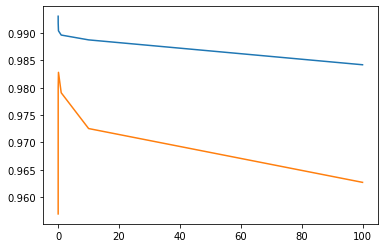

In [149]:
import matplotlib.pyplot as plt

# best alpha를 찾기 위한 시각화
plt.plot(alpha_list, train_scores, label='train')
plt.plot(alpha_list, test_scores, label='test')

### x축의 데이터 범위가 1 이하에 몰려있고 그 이상에서 너무 커져서 소수인 경우에 확인할 수 없음
##### log를 사용하면 됨

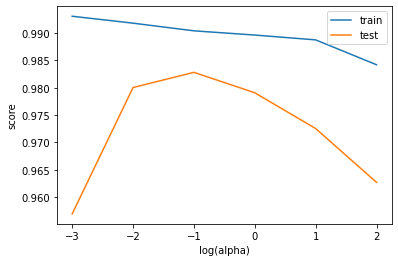

In [150]:
import numpy as np
# log를 이용해서 시각화
plt.plot(np.log10(alpha_list), train_scores, label='train')
plt.plot(np.log10(alpha_list), test_scores, label='test')
plt.xlabel('log(alpha)')
plt.ylabel('score')
plt.legend()
plt.show()

## 골디락스 지점
- log alpha가 -1인 경우(alpha = 0.1)가 train과 test의 간격이 가장 가깝다 > 골디락스 지점이다. (Goldilocks)
- 수도꼭지의 물이 뜨겁지도 차갑지도 않은 적절한 지점

In [151]:
# get best alpha
best_alpha = alpha_list[np.argmax(test_scores)] # test score가 가장 높은 alpha를 찾음
# 단, test score가 train score를 초과하지는 않는지 확인해야 함
print(best_alpha)

0.1


In [152]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(train_scaled, y_train)
print('train score: ',  ridge.score(train_scaled, y_train))
print('test score: ',  ridge.score(test_scaled, y_test))

train score:  0.9903815817570368
test score:  0.9827976465386896


---
# Lasso(L1 규제)
#### 가중치의 절대값으로 규제하는 방법

In [153]:
from sklearn.linear_model import Lasso

lasso = Lasso() # alpha값이 있음
lasso.fit(train_scaled, y_train)
print('train score: ',  lasso.score(train_scaled, y_train))
print('test score: ',  lasso.score(test_scaled, y_test))

train score:  0.989789897208096
test score:  0.9800593698421886


In [154]:
# find best alpha
train_scores = []
test_scores = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, y_train)
    train_scores.append(lasso.score(train_scaled, y_train))
    test_scores.append(lasso.score(test_scaled, y_test))

print(train_scores)
print(test_scores)

[0.990856843502147, 0.9907921500205304, 0.9901376311284481, 0.989789897208096, 0.9888067471131866, 0.9078632190121444]
[0.9836870822242815, 0.9836730006301536, 0.9819405116249365, 0.9800593698421886, 0.9824470598706695, 0.9089071866576978]


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.07596994002, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097474788, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926334916, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


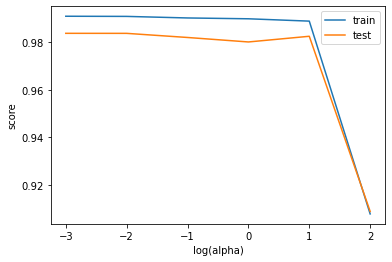

In [155]:
# best alpha를 찾기 위해 로그를 씌워 시각화
plt.plot(np.log10(alpha_list), train_scores, label='train')
plt.plot(np.log10(alpha_list), test_scores, label='test')
plt.xlabel('log(alpha)')
plt.ylabel('score')
plt.legend()
plt.show()


In [156]:
# get best alpha
best_alpha = alpha_list[np.argmax(test_scores)]
print(best_alpha)

0.001


In [161]:
# get score
lasso = Lasso(alpha=best_alpha)
lasso.fit(train_scaled, y_train)
print('train score: ',  lasso.score(train_scaled, y_train))
print('test score: ',  lasso.score(test_scaled, y_test))


train score:  0.990856843502147
test score:  0.9836870822242815


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.07596994002, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


In [158]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 95.61184844, 11.60230215,
        0.        , 10.5804005 ,  0.        , 31.51508869,  0.        ,
       22.30028081,  0.        , 29.10414951,  0.        ,  0.        ,
       18.50441438,  0.        ,  0.        , 41.93702532,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        5.74835225,  0.        ,  0.        ,  0.        , 20.53363452,
        0.        ,  0.        ,  0.        ,  8.8783085 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 35.3124872 ,
        0.        ,  0.        ,  0.        ,  0.        , 21.35881131,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [159]:
ridge.coef_

array([[ 27.61933479,  -1.64022156, -19.73256036,  30.03061951,
         16.99800255,  17.83247301,   4.46928273,   3.87258547,
         22.8351822 ,  19.50417483,  17.75985317,  14.53122144,
         13.34875736,   7.57294011,  19.2573194 ,   5.12766348,
         -2.05671393,  10.62376405,  41.72322888,   5.90722851,
         14.93389276,  -0.4506018 ,  19.86035413,   1.27084276,
         -1.00708878,  19.69043816,  -1.15817017,  -3.57357468,
         11.96629206,  13.68484378,  -8.41738209,  -9.97919956,
          8.42421045,  45.51544903,  -6.23828569,  13.36080282,
        -17.64759601,  28.23566212,  -6.56619234, -25.89115813,
         37.3785331 ,  -0.39779345, -20.82275921, -23.80607786,
         39.96650626,   0.10569722, -20.49768851, -21.74712923,
         -4.12579289,  35.39224119,  -5.59195   , -25.3889504 ,
        -23.93962265,  -1.89229971,  39.44235556]])

In [160]:
print(np.sum(lasso.coef_ == 0))
print(np.sum(ridge.coef_ == 0))

42
0


### 같은 정도의 규제를 가했을 때 ridge가 더 잘 나옴
- 규제는 적을 수록 좋기 때문에 ridge를 씀
- lasso는 컬럼들을 많이 죽여버림